In [2]:
import kagglehub
import os
from collections import Counter
import string
import re

dataset_path = kagglehub.dataset_download("crawford/20-newsgroups")
print("Dataset downloaded to:", dataset_path)

Dataset downloaded to: /home/catalin/.cache/kagglehub/datasets/crawford/20-newsgroups/versions/1


In [3]:
files = os.listdir(dataset_path)
file_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]
print(files)


['comp.sys.ibm.pc.hardware.txt', 'rec.autos.txt', 'rec.motorcycles.txt', 'talk.religion.misc.txt', 'rec.sport.baseball.txt', 'comp.windows.x.txt', 'sci.space.txt', 'sci.electronics.txt', 'sci.med.txt', 'list.csv', 'comp.sys.mac.hardware.txt', 'alt.atheism.txt', 'talk.politics.guns.txt', 'misc.forsale.txt', 'talk.politics.misc.txt', 'comp.os.ms-windows.misc.txt', 'soc.religion.christian.txt', 'sci.crypt.txt', 'talk.politics.mideast.txt', 'comp.graphics.txt', 'rec.sport.hockey.txt']


In [4]:
def analyze_text_files_full_metrics_sorted(file_list):
    """
    Opens each file, counts words and visible characters, and returns
    individual character counts sorted by frequency.

    Args:
        file_list (list): A list of file paths.

    Returns:
        tuple: Total word count, total visible char count, and individual
               character counts sorted by frequency (descending).
    """
    all_character_counts = Counter()
    total_visible_char_count = 0
    total_word_count = 0
    visible_characters = set(string.printable) - set(string.whitespace)
    visible_characters.add(' ')

    for file_path in file_list:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                for char in content:
                    if char in visible_characters:
                        all_character_counts[char] += 1
                        total_visible_char_count += 1
                words = re.findall(r'\b\w+\b', content.lower())
                total_word_count += len(words)
        except UnicodeDecodeError:
            try:
                with open(file_path, 'r', encoding='latin-1') as file:
                    content = file.read()
                    for char in content:
                        if char in visible_characters:
                            all_character_counts[char] += 1
                            total_visible_char_count += 1
                    words = re.findall(r'\b\w+\b', content.lower())
                    total_word_count += len(words)
            except Exception as e:
                raise Exception(f"Error reading {file_path} with 'latin-1': {e}")
        except FileNotFoundError as e:
            raise FileNotFoundError(f"File not found: {file_path}") from e
        except Exception as e:
            raise Exception(f"Error reading {file_path}: {e}")

    # Sort the character counts by value (frequency) in descending order
    sorted_char_counts = sorted(all_character_counts.items(), key=lambda item: item[1], reverse=True)
    return total_word_count, total_visible_char_count, dict(sorted_char_counts)

In [5]:
try:
    word_count, total_char_count, individual_char_counts = analyze_text_files_full_metrics_sorted(file_paths)
    print(f"Total Word Count: {word_count}")
    print(f"Total Visible Character Count: {total_char_count}")
    print("\nIndividual Character Counts:")
    for char, count in individual_char_counts.items():
        print(f"Character '{char}': {count}")
except (FileNotFoundError, UnicodeDecodeError, Exception) as error:
    print(f"An error occurred: {error}")

Total Word Count: 12017348
Total Visible Character Count: 70205926

Individual Character Counts:
Character ' ': 12002220
Character 'e': 5553777
Character 't': 4087691
Character 'o': 3646092
Character 'a': 3596011
Character 'i': 3232310
Character 'n': 3130128
Character 's': 3005185
Character 'r': 2855254
Character 'h': 2078026
Character 'l': 1897500
Character 'd': 1653619
Character 'c': 1546331
Character 'u': 1507855
Character 'm': 1257084
Character '.': 1147734
Character 'p': 988835
Character '-': 971639
Character 'g': 906175
Character 'y': 894257
Character 'f': 859697
Character 'w': 838507
Character 'b': 715946
Character '>': 546715
Character ',': 532618
Character 'v': 495777
Character 'I': 414898
Character 'A': 412135
Character 'k': 396061
Character ''': 357164
Character ':': 355537
Character 'S': 316551
Character '1': 305164
Character 'T': 275565
Character '0': 266174
Character '=': 252645
Character 'M': 238517
Character ')': 228283
Character '(': 223370
Character '_': 221743
Charac

In [6]:
def get_key_presses_detailed(char_counts):
    """
    Simulates key presses for each character and counts the occurrences of
    each key press combination (lowercase, SHIFT+key, SPACE).

    Args:
        char_counts (dict): A dictionary where keys are characters and values are their counts.

    Returns:
        dict: A dictionary where keys are the key press representations
              (e.g., 'a', 'SHIFT+A', 'SPACE') and values are their counts.
    """
    key_press_counts = Counter()

    for char, count in char_counts.items():
        if 'a' <= char <= 'z':
            key_press = char
        elif 'A' <= char <= 'Z':
            key_press = "SHIFT"
        elif char == ' ':
            key_press = "SPACE"
        elif char in "!@#$%^&*()_+{}|:\"<>?~`":
            key_press = "SHIFT"
        elif char in "[]\\;',./-=":
            key_press = char
        elif char.isdigit():
            key_press = char
        else:
            key_press = f"OTHER+{char}"  # Handle characters not on standard keyboard

        key_press_counts[key_press] += count

    return dict(key_press_counts)

In [7]:
key_presses = get_key_presses_detailed(individual_char_counts)

In [8]:
for key, count in key_presses.items():
    print(f"Key: {key:>5}, Percentage: {(count/total_char_count):.5f}, Percentage (no SPACE,SHIFT): {(count/(total_char_count-key_presses['SPACE']-key_presses['SHIFT'])):.5f}")

Key: SPACE, Percentage: 0.17096, Percentage (no SPACE,SHIFT): 0.23595
Key:     e, Percentage: 0.07911, Percentage (no SPACE,SHIFT): 0.10918
Key:     t, Percentage: 0.05822, Percentage (no SPACE,SHIFT): 0.08036
Key:     o, Percentage: 0.05193, Percentage (no SPACE,SHIFT): 0.07168
Key:     a, Percentage: 0.05122, Percentage (no SPACE,SHIFT): 0.07069
Key:     i, Percentage: 0.04604, Percentage (no SPACE,SHIFT): 0.06354
Key:     n, Percentage: 0.04458, Percentage (no SPACE,SHIFT): 0.06154
Key:     s, Percentage: 0.04281, Percentage (no SPACE,SHIFT): 0.05908
Key:     r, Percentage: 0.04067, Percentage (no SPACE,SHIFT): 0.05613
Key:     h, Percentage: 0.02960, Percentage (no SPACE,SHIFT): 0.04085
Key:     l, Percentage: 0.02703, Percentage (no SPACE,SHIFT): 0.03730
Key:     d, Percentage: 0.02355, Percentage (no SPACE,SHIFT): 0.03251
Key:     c, Percentage: 0.02203, Percentage (no SPACE,SHIFT): 0.03040
Key:     u, Percentage: 0.02148, Percentage (no SPACE,SHIFT): 0.02964
Key:     m, Percenta

In [9]:
print(key_presses)


{'SPACE': 12002220, 'e': 5553777, 't': 4087691, 'o': 3646092, 'a': 3596011, 'i': 3232310, 'n': 3130128, 's': 3005185, 'r': 2855254, 'h': 2078026, 'l': 1897500, 'd': 1653619, 'c': 1546331, 'u': 1507855, 'm': 1257084, '.': 1147734, 'p': 988835, '-': 971639, 'g': 906175, 'y': 894257, 'f': 859697, 'w': 838507, 'b': 715946, 'SHIFT': 7336538, ',': 532618, 'v': 495777, 'k': 396061, "'": 357164, '1': 305164, '0': 266174, '=': 252645, '2': 203868, '3': 181301, '5': 164242, '9': 158445, '4': 156124, '6': 135750, '8': 131040, 'x': 123402, '7': 119420, '/': 113107, 'j': 110558, 'z': 57014, '\\': 51683, ';': 51003, 'q': 48254, ']': 44545, '[': 42156}


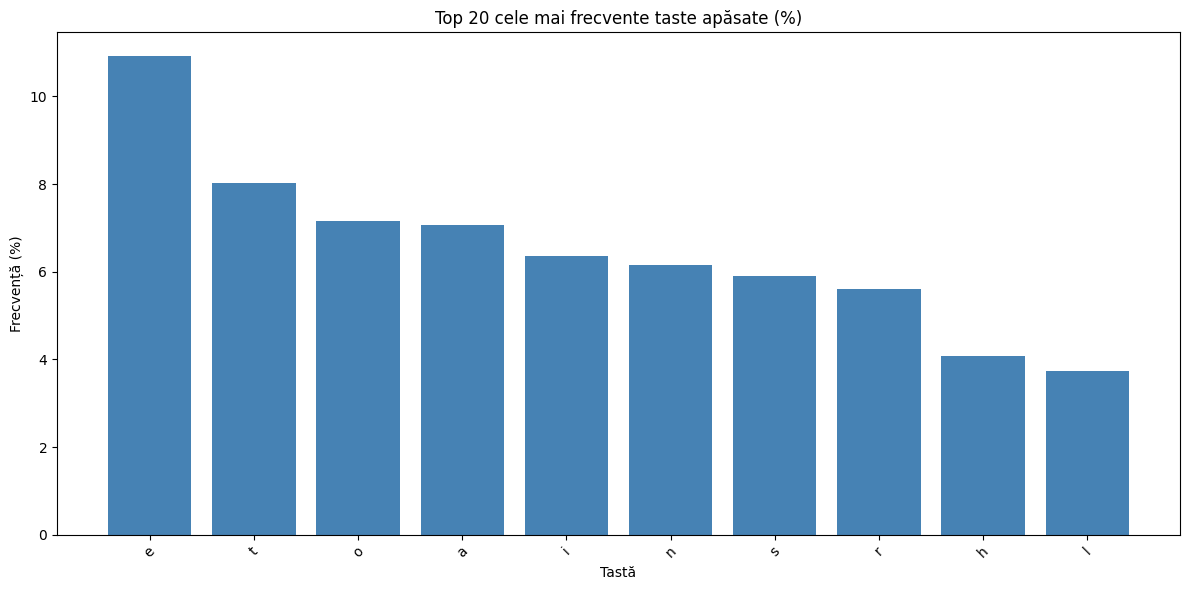

In [14]:
import matplotlib.pyplot as plt

# Remove 'SPACE' and 'SHIFT'
filtered = {k: v for k, v in key_presses.items() if k not in ('SPACE', 'SHIFT')}

# Convert to percentage
total = sum(filtered.values())
percentages = {k: (v / total) * 100 for k, v in filtered.items()}

# Sort and select top 20
sorted_items = sorted(percentages.items(), key=lambda x: x[1], reverse=True)[:10]
keys, values = zip(*sorted_items)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='steelblue')
plt.title('Top 20 cele mai frecvente taste apăsate (%)')
plt.xlabel('Tastă')
plt.ylabel('Frecvență (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
sorted_items

[('e', 10.918195799695395),
 ('t', 8.03601057562316),
 ('o', 7.1678690663494375),
 ('a', 7.069414597643808),
 ('i', 6.354413125574437),
 ('n', 6.153533060853713),
 ('s', 5.907907041335582),
 ('r', 5.613156997456591),
 ('h', 4.085200890287425),
 ('l', 3.7303039949068917)]